<a href="https://colab.research.google.com/github/ShivaniMareddy/hypothesis_testing_and_statistical_inference/blob/main/Hypothesis_Testing_and_Statistical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [695]:
import seaborn as sns
import numpy as np
df=sns.load_dataset("taxis")
print(df.head())
print(df.columns)
print(df.size)
print(df.shape)
print(df.info())
print(df.describe())


               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [696]:
print(df.describe(include=object))

         color      payment     pickup_zone           dropoff_zone  \
count     6433         6389            6407                   6388   
unique       2            2             194                    203   
top     yellow  credit card  Midtown Center  Upper East Side North   
freq      5451         4577             230                    245   

       pickup_borough dropoff_borough  
count            6407            6388  
unique              4               5  
top         Manhattan       Manhattan  
freq             5268            5206  


In [697]:
df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [698]:
df.isnull().sum()/len(df)*100

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [699]:
df.dropna().shape[0]

6341

In [700]:
df.shape[0]-df.dropna().shape[0]

92

In [701]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100

1.4301259132597544

In [702]:
df.dropna(inplace=True)

In [703]:
df=df.reset_index(drop=True)

In [704]:
df.shape

(6341, 14)

In [705]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


In [706]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [707]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


EDA

tip is the target column

tip is numerical feature,analyze with color feature which is catogorical

In [708]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


2 unique categories



<Axes: xlabel='color', ylabel='tip'>

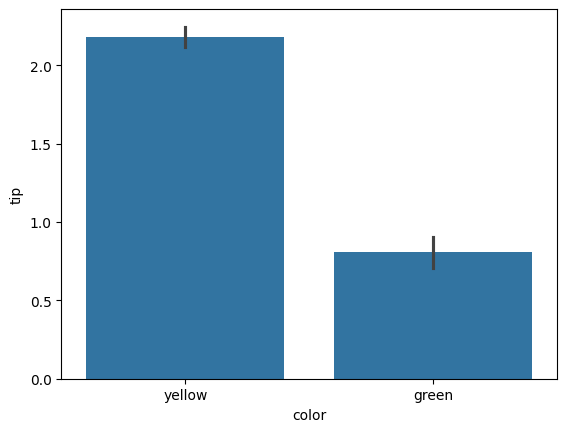

In [709]:
#graphical analysis of categorical data
sns.barplot(x=df.color,y=df.tip,estimator='mean')

<Axes: xlabel='color', ylabel='tip'>

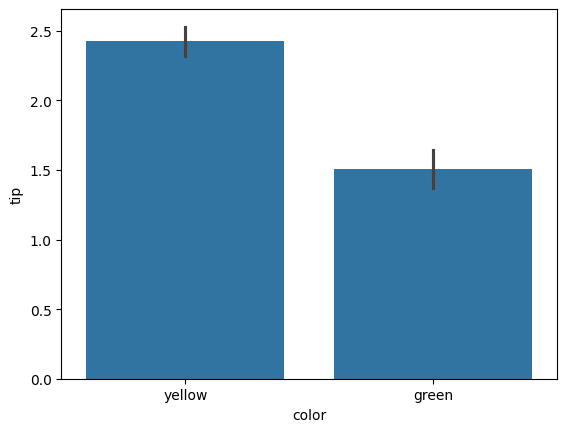

In [710]:
#graphical analysis of categorical data
sns.barplot(x=df.color,y=df.tip,estimator='std')

In [711]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='tip', ylabel='Count'>

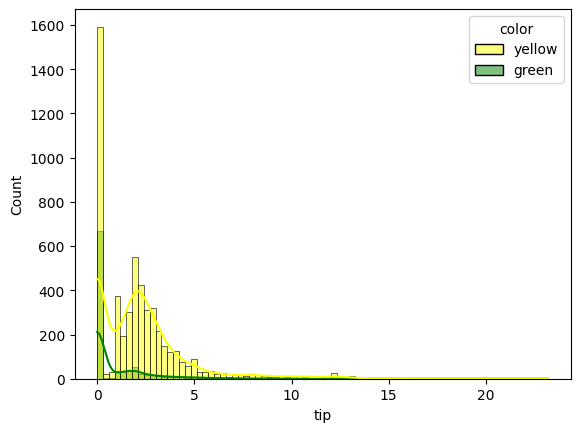

In [712]:
sns.histplot(x=df.tip,hue=df.color,kde=True,palette={"yellow": "yellow", "green": "green"})

The tip distribution is right-skewed with most tips between 1 and 4. While the yellow category has more observations, both groups follow a similar tipping pattern, indicating color has limited influence on tip amount.”

H0:distribution of tip for yellow=distribution of tip for green

H1:H0:distribution of tip for yellow not equal distribution of tip for green

In [713]:
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']
print(yellow_tip)
print(green_tip)

0       2.15
1       0.00
2       2.36
3       6.15
4       1.10
        ... 
5368    2.66
5369    2.36
5370    2.56
5371    2.36
5372    1.33
Name: tip, Length: 5373, dtype: float64
5373    0.00
5374    0.00
5375    1.20
5376    0.00
5377    0.00
        ... 
6336    1.06
6337    0.00
6338    0.00
6339    0.00
6340    3.36
Name: tip, Length: 968, dtype: float64


In [714]:
green_tip.shape

(968,)

In [715]:
yellow_tip.shape

(5373,)

In [716]:
# Independent T-Test
from scipy import stats
t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)


Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64


In [717]:
alpha=0.05
if p_val<alpha:
    print("Reject the null hypothesis:The tip for yellow category is different that of green")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis:The tip for yellow category is different that of green


In [718]:
#There is effect of color on tip column


In [719]:
df.payment.value_counts()


,count
payment,
credit card,4546
cash,1795


<Axes: xlabel='payment', ylabel='tip'>

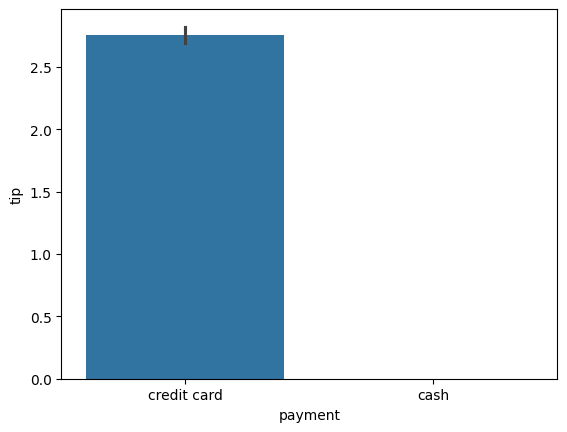

In [720]:
sns.barplot(x=df.payment, y=df.tip, estimator='mean')



<Axes: xlabel='payment', ylabel='tip'>

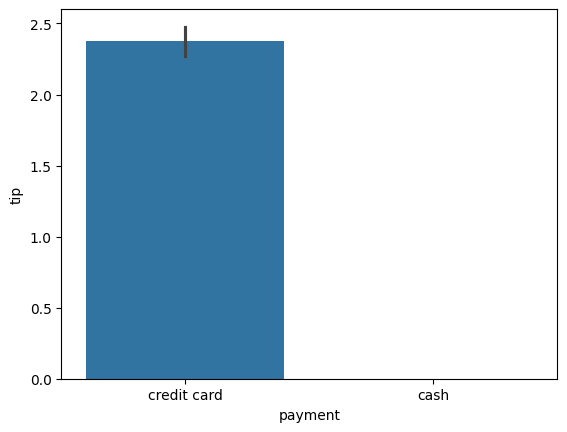

In [721]:
sns.barplot(x=df.payment, y=df.tip, estimator='std')


<Axes: xlabel='tip', ylabel='Count'>

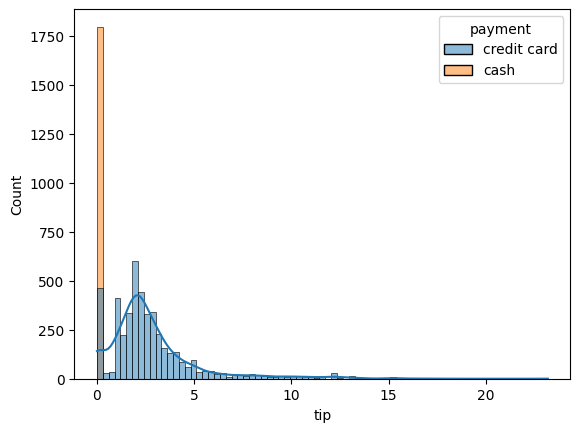

In [722]:
sns.histplot(
    x=df.tip,
    hue=df.payment,
    kde=True
)

In [723]:
cash_tip = df['tip'][df['payment'] == 'cash']
card_tip = df['tip'][df['payment'] == 'credit_card']

print(cash_tip)
print(card_tip)


1       0.0
9       0.0
12      0.0
13      0.0
14      0.0
       ... 
6328    0.0
6330    0.0
6332    0.0
6335    0.0
6338    0.0
Name: tip, Length: 1795, dtype: float64
Series([], Name: tip, dtype: float64)


In [724]:
t_stat, p_val = stats.ttest_ind(cash_tip, card_tip, nan_policy='omit')

print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)


Independent T-Test statistic: nan
P-value: nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [725]:
alpha = 0.05

if p_val < alpha:
    print("Reject the null hypothesis: Tip differs by payment type")
else:
    print("Fail to reject the null hypothesis: No significant difference in tips")


Fail to reject the null hypothesis: No significant difference in tips


In [726]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

/tmp/ipython-input-1237546309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['pickup_borough'],palette={'Manhattan':'red','Queens':'blue','Bronx':'green','Brooklyn':'purple'})


<Axes: xlabel='count', ylabel='pickup_borough'>

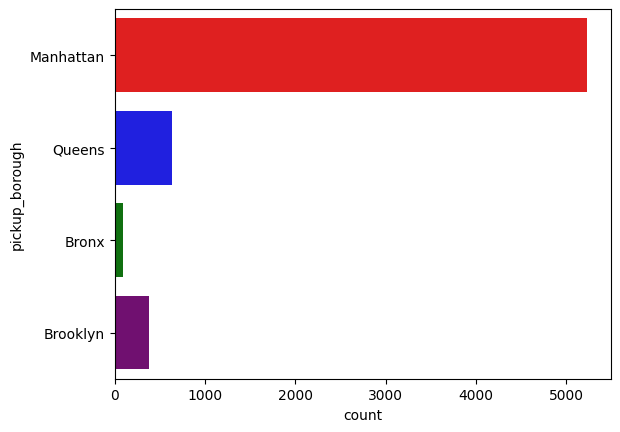

In [727]:
sns.countplot(df['pickup_borough'],palette={'Manhattan':'red','Queens':'blue','Bronx':'green','Brooklyn':'purple'})

/tmp/ipython-input-3915795198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],palette='Set2',estimator='mean')


<Axes: xlabel='pickup_borough', ylabel='tip'>

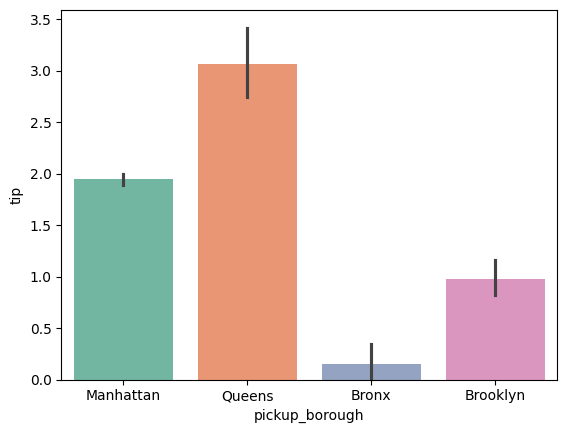

In [728]:
sns.barplot(x=df['pickup_borough'],y=df['tip'],palette='Set2',estimator='mean')

In [729]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


In [730]:
df['tip'].groupby(df['pickup_borough']).std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


<Axes: xlabel='tip', ylabel='Count'>

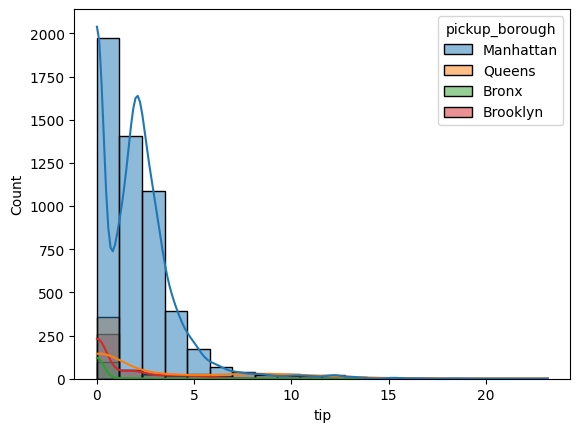

In [731]:
sns.histplot(x=df['tip'],hue=df['pickup_borough'],kde=True,bins=20)

Hypothesis

H0:distribution of tip is the same across all pickup_borough categories

H1:At least one category has a different distribution of tip




In [732]:
manhattan_tip = df['tip'][df['pickup_borough'] == 'Manhattan']
queens_tip = df['tip'][df['pickup_borough'] == 'Queens']
bronx_tip = df['tip'][df['pickup_borough'] == 'Bronx']
brooklyn_tip = df['tip'][df['pickup_borough'] == 'Brooklyn']

print(manhattan_tip)
print(queens_tip)
print(bronx_tip)
print(brooklyn_tip)

0       2.15
1       0.00
2       2.36
3       6.15
4       1.10
        ... 
6328    0.00
6330    0.00
6332    0.00
6334    0.50
6336    1.06
Name: tip, Length: 5226, dtype: float64
9       0.00
21      8.31
41      0.00
51      0.00
54      0.00
        ... 
6311    0.00
6325    0.00
6326    1.76
6331    0.00
6337    0.00
Name: tip, Length: 638, dtype: float64
90      0.0
172     0.0
606     0.0
1195    0.0
1822    0.0
       ... 
6295    0.0
6301    0.0
6318    0.0
6321    0.0
6335    0.0
Name: tip, Length: 99, dtype: float64
112     5.58
153     1.46
212     0.00
264     3.76
330     0.00
        ... 
6329    0.00
6333    0.00
6338    0.00
6339    0.00
6340    3.36
Name: tip, Length: 378, dtype: float64


In [733]:
categories=[group['tip'].values for name,group in df.groupby('pickup_borough')]
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("p-value:",p_val)
alpha=0.05
if p_val <alpha:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")


p-value: 5.155109332422435e-58
reject null hypothesis


In [734]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df.tip,groups=df.pickup_borough,alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


In [735]:
df['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

/tmp/ipython-input-2669693208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['dropoff_borough'],palette='Set1')


<Axes: xlabel='count', ylabel='dropoff_borough'>

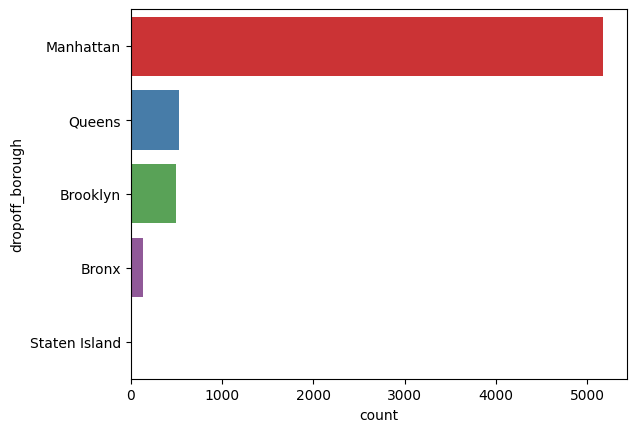

In [736]:
sns.countplot(df['dropoff_borough'],palette='Set1')

/tmp/ipython-input-2562374262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_borough'],y=df['tip'],palette='Set2',estimator='mean')


<Axes: xlabel='dropoff_borough', ylabel='tip'>

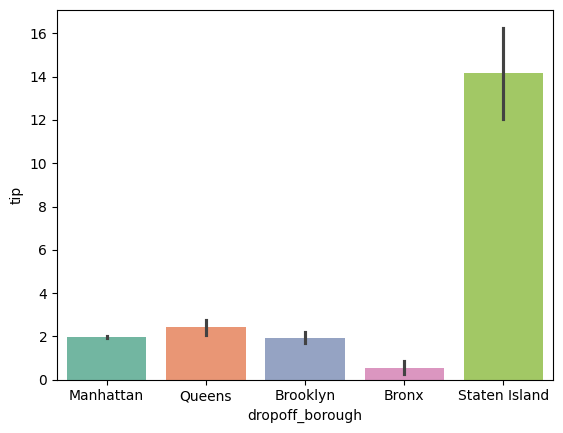

In [737]:
sns.barplot(x=df['dropoff_borough'],y=df['tip'],palette='Set2',estimator='mean')

In [738]:
df['tip'].groupby(df['dropoff_borough']).mean()

,tip
dropoff_borough,
Bronx,0.534706
Brooklyn,1.921590
Manhattan,1.964321
Queens,2.422022
Staten Island,14.165000


In [739]:
df['tip'].groupby(df['dropoff_borough']).std()

,tip
dropoff_borough,
Bronx,1.788795
Brooklyn,2.896229
Manhattan,2.052074
Queens,3.947016
Staten Island,2.976920


<Axes: xlabel='tip', ylabel='Count'>

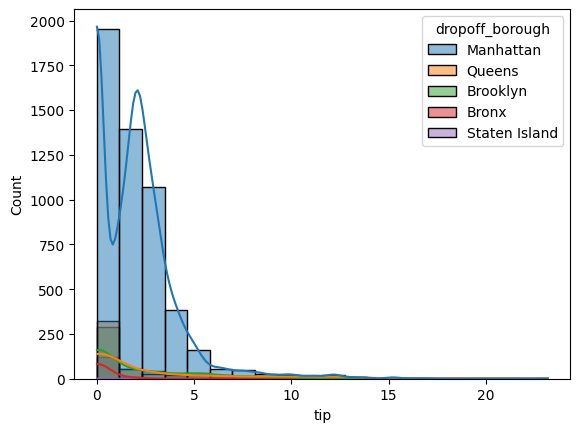

In [740]:
sns.histplot(x=df['tip'],hue=df['dropoff_borough'],kde=True,bins=20)

In [741]:
manhattan_tip = df['tip'][df['dropoff_borough'] == 'Manhattan']
queens_tip = df['tip'][df['dropoff_borough'] == 'Queens']
bronx_tip = df['tip'][df['dropoff_borough'] == 'Bronx']
brooklyn_tip = df['tip'][df['dropoff_borough'] == 'Brooklyn']
statenisland_tip = df['tip'][df['dropoff_borough'] == 'Staten Island']

print(manhattan_tip)
print(queens_tip)
print(bronx_tip)
print(brooklyn_tip)
print(statenisland_tip)



0       2.15
1       0.00
2       2.36
3       6.15
4       1.10
        ... 
6328    0.00
6332    0.00
6334    0.50
6335    0.00
6336    1.06
Name: tip, Length: 5172, dtype: float64
9       0.00
51      0.00
73      0.00
86      0.00
109     9.71
        ... 
6310    2.00
6311    0.00
6326    1.76
6329    0.00
6331    0.00
Name: tip, Length: 534, dtype: float64
172     0.00
348     0.00
441     0.00
504     1.59
657     0.00
        ... 
6295    0.00
6318    0.00
6321    0.00
6330    0.00
6337    0.00
Name: tip, Length: 136, dtype: float64
39      6.06
94      0.00
107     1.00
149     7.46
153     1.46
        ... 
6324    0.00
6333    0.00
6338    0.00
6339    0.00
6340    3.36
Name: tip, Length: 497, dtype: float64
2090    16.27
4152    12.06
Name: tip, dtype: float64


In [742]:
# regions=[group['spending_score'].values for name,froup in df.groupby('pickup_borough')]
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,statenisland_tip)
print("p-value:",p_val)
alpha=0.05
if p_val <alpha:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")


p-value: 5.87859571331583e-26
reject null hypothesis


In [743]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df.tip,groups=df.dropoff_borough,alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


<Axes: xlabel='pickup_zone', ylabel='count'>

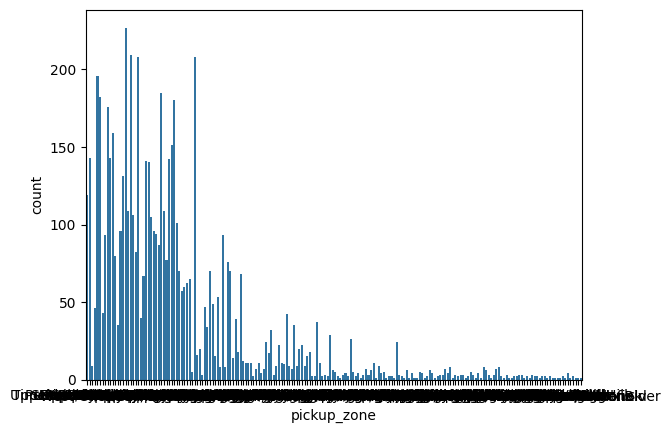

In [744]:
sns.countplot(x=df['pickup_zone'])

<Axes: xlabel='dropoff_zone', ylabel='count'>

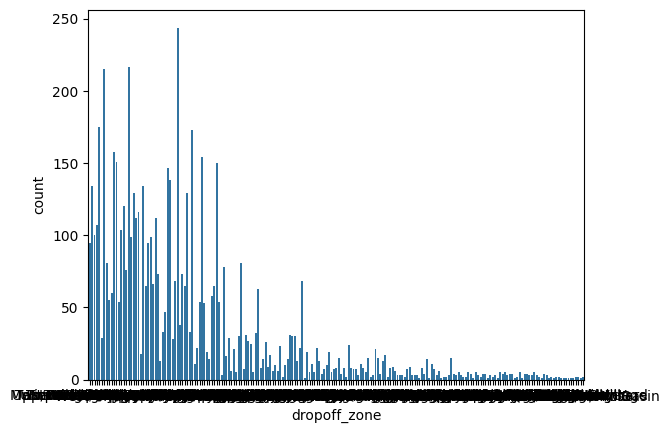

In [745]:
sns.countplot(x=df['dropoff_zone'])

In [746]:
categories=[group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("p-value:",p_val)
alpha=0.05
if p_val <alpha:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")

p-value: 2.6378206902104746e-15
reject null hypothesis


In [747]:
categories=[group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,statenisland_tip)
print("p-value:",p_val)
alpha=0.05
if p_val <alpha:
  print("reject null hypothesis")
else:
  print("fail to reject null hypothesis")

p-value: 5.87859571331583e-26
reject null hypothesis


<Axes: xlabel='tip', ylabel='Count'>

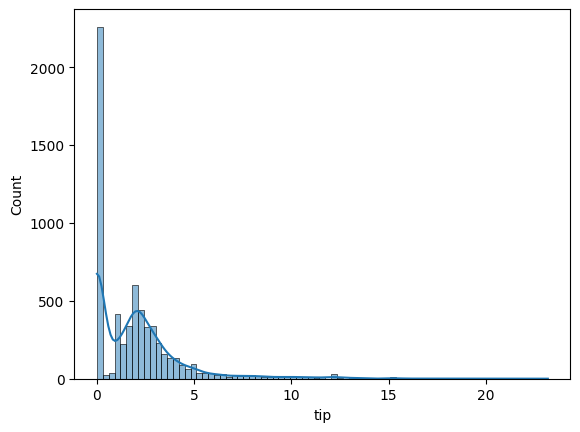

In [748]:
sns.histplot(df['tip'],kde=True)

<Axes: xlabel='distance', ylabel='Count'>

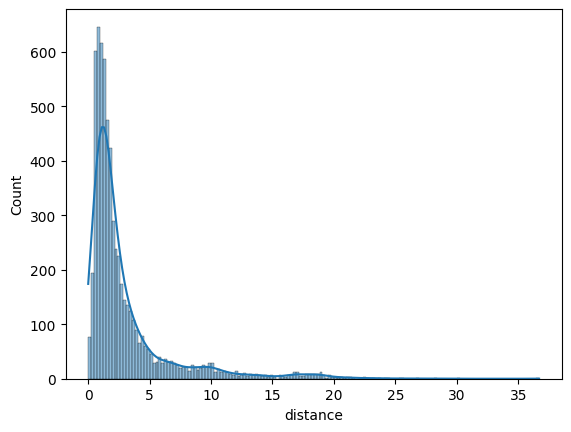

In [749]:
sns.histplot(df['distance'],kde=True)

<Axes: xlabel='tolls', ylabel='Count'>

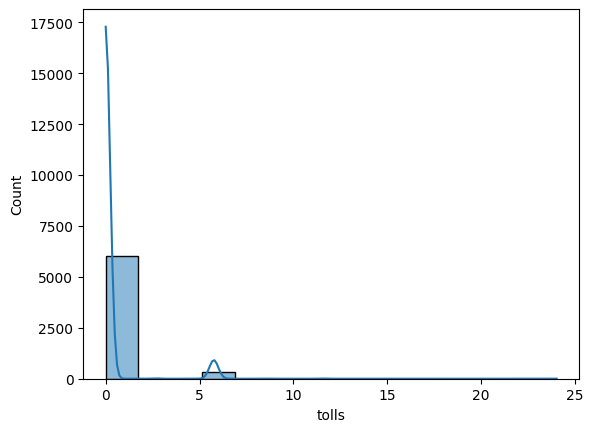

In [750]:
sns.histplot(df['tolls'],kde=True)

<Axes: xlabel='passengers', ylabel='Count'>

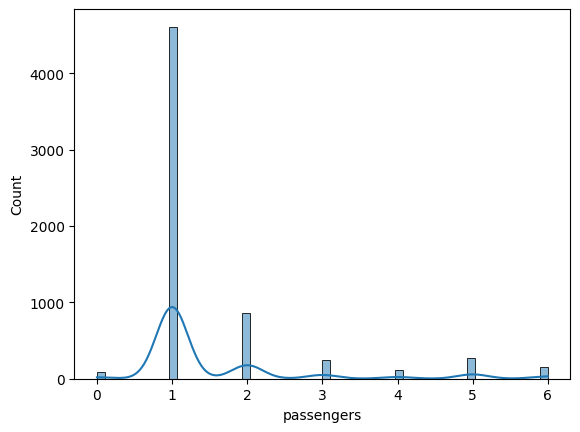

In [751]:
sns.histplot(df['passengers'],kde=True)

<Axes: xlabel='total', ylabel='count'>

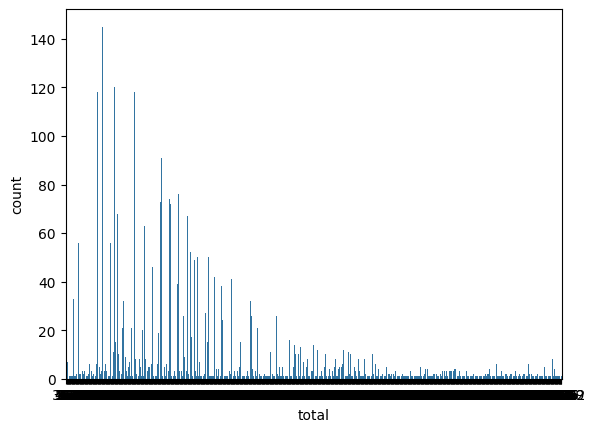

In [752]:
sns.countplot(x=df['total'])

<Axes: xlabel='tip', ylabel='passengers'>

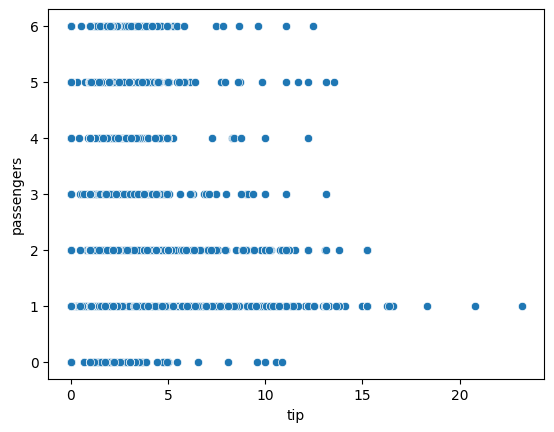

In [753]:
sns.scatterplot(x=df['tip'],y=df['passengers'])

In [754]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print('correlation',r)
print("p-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

correlation 0.027509812818779178
p-value: 0.028480753176042872
Reject null hypothesis


In [755]:
r,p_val=stats.spearmanr(df['tip'],df['distance'])
print('correlation',r)
print("p-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

correlation 0.29265085410043695
p-value: 1.9411181331374707e-125
Reject null hypothesis


In [756]:
r,p_val=stats.spearmanr(df['tip'],df['fare'])
print('correlation',r)
print("p-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

correlation 0.310254279563729
p-value: 1.5556730728881364e-141
Reject null hypothesis


In [757]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print('correlation',r)
print("p-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

correlation 0.175380002891528
p-value: 5.643276180955435e-45
Reject null hypothesis


In [758]:
r,p_val=stats.spearmanr(df['tip'],df['total'])
print('correlation',r)
print("p-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

correlation 0.5028299699182296
p-value: 0.0
Reject null hypothesis


<Axes: xlabel='tip', ylabel='distance'>

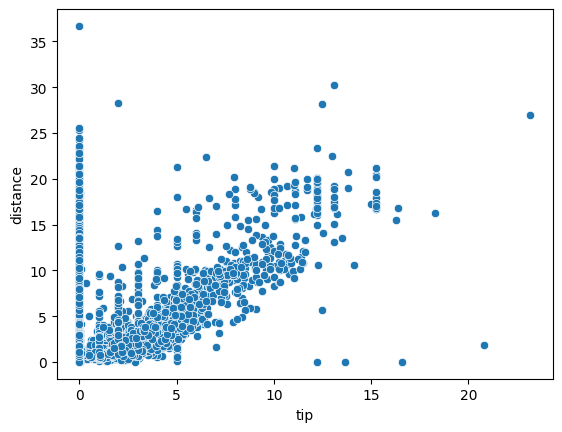

In [759]:
sns.scatterplot(x=df['tip'],y=df['distance'])

<Axes: xlabel='tip', ylabel='fare'>

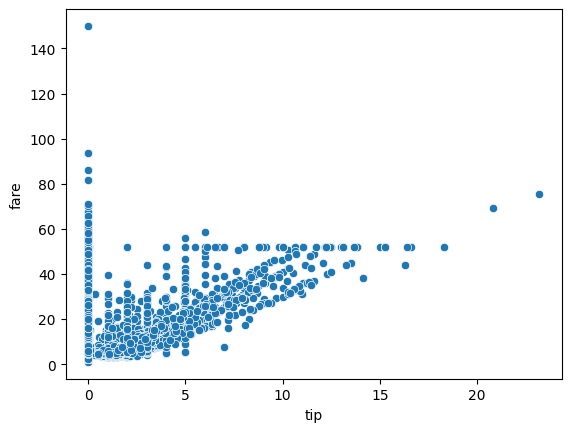

In [760]:
sns.scatterplot(x=df['tip'],y=df['fare'])

<Axes: xlabel='tip', ylabel='tolls'>

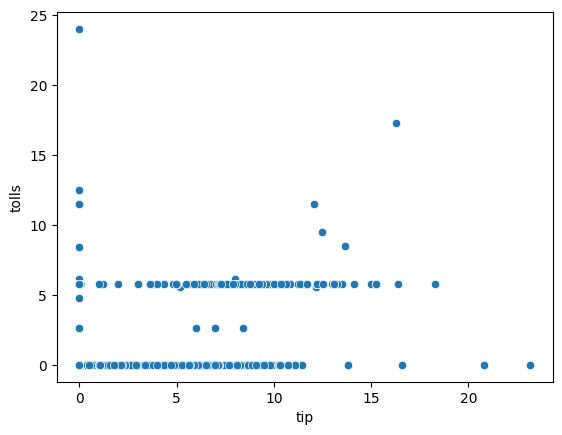

In [761]:
sns.scatterplot(x=df['tip'],y=df['tolls'])

<Axes: xlabel='tip', ylabel='total'>

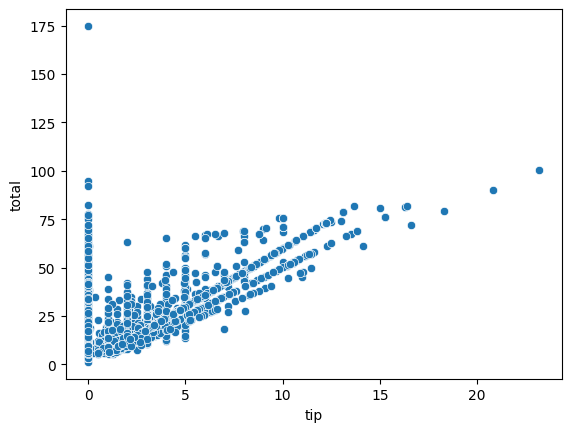

In [762]:
sns.scatterplot(x=df['tip'],y=df['total'])

In [763]:
df['pickup']

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6336,2019-03-31 09:51:53
6337,2019-03-31 17:38:00
6338,2019-03-23 22:55:18
6339,2019-03-04 10:09:25


In [764]:
df['pickup'].dt.day

,pickup
0,23
1,4
2,27
3,10
4,30
...,...
6336,31
6337,31
6338,23
6339,4


In [765]:
df['pickup'].dt.month

,pickup
0,3
1,3
2,3
3,3
4,3
...,...
6336,3
6337,3
6338,3
6339,3


In [766]:
df['pickup'].dt.month_name()

,pickup
0,March
1,March
2,March
3,March
4,March
...,...
6336,March
6337,March
6338,March
6339,March


In [767]:
df['pickup'].dt.year

,pickup
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
6336,2019
6337,2019
6338,2019
6339,2019


In [768]:
df['pickup'].dt.quarter

,pickup
0,1
1,1
2,1
3,1
4,1
...,...
6336,1
6337,1
6338,1
6339,1


In [769]:
df['pickup'].dt.day_name()

,pickup
0,Saturday
1,Monday
2,Wednesday
3,Sunday
4,Saturday
...,...
6336,Sunday
6337,Sunday
6338,Saturday
6339,Monday


In [770]:
df['pickup'].dt.weekday

,pickup
0,5
1,0
2,2
3,6
4,5
...,...
6336,6
6337,6
6338,5
6339,0


In [771]:
df['pickup'].dt.hour

,pickup
0,20
1,16
2,17
3,1
4,13
...,...
6336,9
6337,17
6338,22
6339,10


In [772]:
df['pickup'].dt.minute

,pickup
0,21
1,11
2,53
3,23
4,27
...,...
6336,51
6337,38
6338,55
6339,9


In [773]:
df['pickup'].dt.second

,pickup
0,9
1,55
2,1
3,59
4,42
...,...
6336,53
6337,0
6338,18
6339,25


In [774]:
df['pickup'].unique()
len(df['pickup'].unique())

6322

In [775]:
df['pickup_month']=df['pickup'].dt.month_name()

In [776]:
df['pickup_year']=df['pickup'].dt.year

In [777]:
df['pickup_day']=df['pickup'].dt.day

In [778]:
df['pickup_dayname']=df['pickup'].dt.day_name()

In [779]:
df['pickup_hour'] = df['pickup'].dt.hour

In [780]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,March,2019,23,Saturday,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,March,2019,4,Monday,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,March,2019,27,Wednesday,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,March,2019,10,Sunday,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,March,2019,30,Saturday,13


In [781]:
df.pickup_month.value_counts()

,count
pickup_month,
March,6340
February,1


In [782]:
df['dropoff'].unique()
len(df['dropoff'].unique())

6333

In [783]:
df['dropoff_month']=df['dropoff'].dt.month_name()

In [784]:
df['dropoff_year']=df['dropoff'].dt.year

In [785]:
df['dropoff_day']=df['dropoff'].dt.day

In [786]:
df['dropoff_dayname']=df['dropoff'].dt.day_name()

In [787]:
df['dropoff_hour']=df['dropoff'].dt.hour

In [788]:
df['dropoff_minute']=df['dropoff'].dt.minute

In [789]:
df['dropoff_second']=df['dropoff'].dt.second

In [790]:
df['dropoff_quarter']=df['dropoff'].dt.quarter

In [791]:
df.shape

(6341, 27)

In [792]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'pickup_month', 'pickup_year',
       'pickup_day', 'pickup_dayname', 'pickup_hour', 'dropoff_month',
       'dropoff_year', 'dropoff_day', 'dropoff_dayname', 'dropoff_hour',
       'dropoff_minute', 'dropoff_second', 'dropoff_quarter'],
      dtype='object')

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  pickup_month     6341 non-null   object 

In [794]:
r, p_val = stats.spearmanr(df['tip'], df['pickup_day'])
print("Spearman correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



Spearman correlation: 0.00999688489379292
p-value: 0.42607920373413977
Fail to reject null hypothesis


In [795]:
r, p_val = stats.spearmanr(df['pickup_year'], df['tip'])
print("Pickup Year vs Tip (Spearman)")
print("correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")



Pickup Year vs Tip (Spearman)
correlation: nan
p-value: nan
Fail to reject null hypothesis


/tmp/ipython-input-1853507686.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['pickup_year'], df['tip'])


In [796]:
r, p_val = stats.spearmanr(df['dropoff_day'], df['tip'])
print("Dropoff Day vs Tip (Spearman)")
print("correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Dropoff Day vs Tip (Spearman)
correlation: 0.010829999394669469
p-value: 0.38854863611464274
Fail to reject null hypothesis


In [797]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_hour'])
print("Spearman correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Spearman correlation: 0.056776702660829036
p-value: 6.0707751854063095e-06
Reject null hypothesis


In [798]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_minute'])
print("Spearman correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Spearman correlation: -0.006782156904046719
p-value: 0.5892207712099395
Fail to reject null hypothesis


In [799]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_second'])
print("Spearman correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Spearman correlation: -0.001584000947940426
p-value: 0.8996449823973446
Fail to reject null hypothesis


In [800]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_quarter'])
print("Spearman correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Spearman correlation: -0.014378341502159876
p-value: 0.25229761827973424
Fail to reject null hypothesis


In [801]:
groups = [g['tip'] for _, g in df.groupby('pickup_dayname')]
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


F-statistic: 1.6689152148182256
p-value: 0.1242843162257308
Fail to reject null hypothesis


In [802]:
groups = [g['tip'] for _, g in df.groupby('dropoff_dayname')]
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


F-statistic: 1.6190096694735556
p-value: 0.13742247930087778
Fail to reject null hypothesis


In [803]:
groups = [g['tip'] for _, g in df.groupby('pickup_month')]

f_stat, p_val = stats.f_oneway(*groups)
print("Pickup Month vs Tip")
print("F-statistic:", f_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Pickup Month vs Tip
F-statistic: 0.697669075772745
p-value: 0.4035995080175966
Fail to reject null hypothesis


In [804]:
groups = [g['tip'] for _, g in df.groupby('dropoff_month')]

f_stat, p_val = stats.f_oneway(*groups)
print("Dropoff Month vs Tip")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Dropoff Month vs Tip
F-statistic: 0.6977458764114045
p-value: 0.4977441577891454
Fail to reject null hypothesis


In [805]:
r, p_val = stats.spearmanr(df['dropoff_year'], df['tip'])
print("Dropoff Year vs Tip (Spearman)")
print("correlation:", r)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Dropoff Year vs Tip (Spearman)
correlation: nan
p-value: nan
Fail to reject null hypothesis


/tmp/ipython-input-3049637156.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['dropoff_year'], df['tip'])


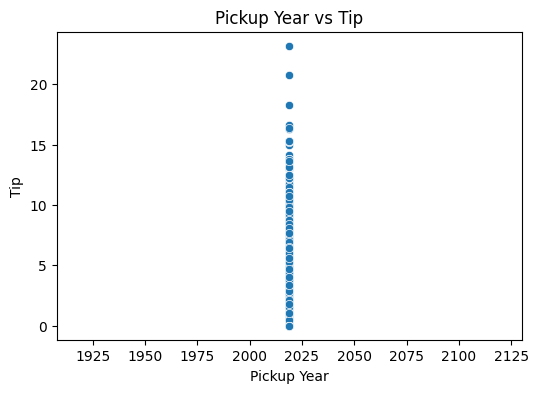

In [806]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['pickup_year'], y=df['tip'])
plt.title("Pickup Year vs Tip")
plt.xlabel("Pickup Year")
plt.ylabel("Tip")
plt.show()


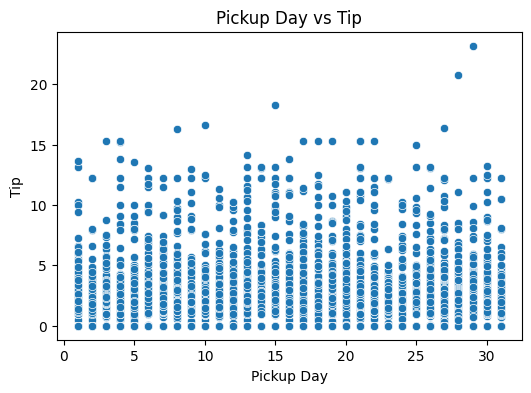

In [807]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['pickup_day'], y=df['tip'])
plt.title("Pickup Day vs Tip")
plt.xlabel("Pickup Day")
plt.ylabel("Tip")
plt.show()


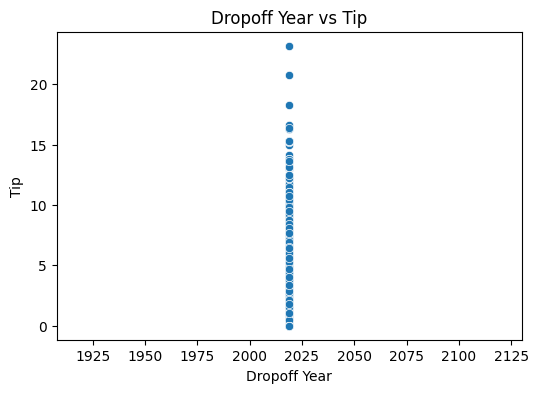

In [808]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_year'], y=df['tip'])
plt.title("Dropoff Year vs Tip")
plt.xlabel("Dropoff Year")
plt.ylabel("Tip")
plt.show()


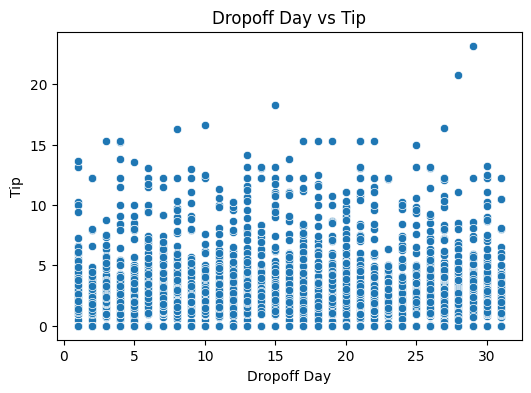

In [809]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_day'], y=df['tip'])
plt.title("Dropoff Day vs Tip")
plt.xlabel("Dropoff Day")
plt.ylabel("Tip")
plt.show()


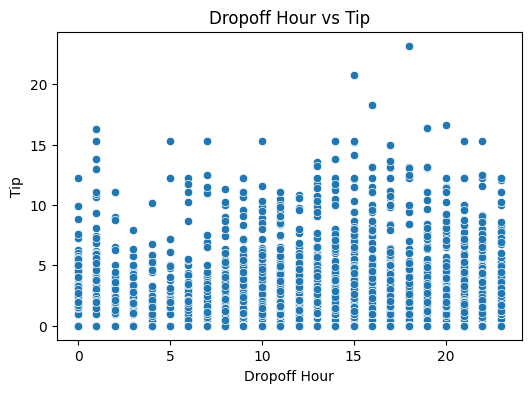

In [810]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_hour'], y=df['tip'])
plt.title("Dropoff Hour vs Tip")
plt.xlabel("Dropoff Hour")
plt.ylabel("Tip")
plt.show()


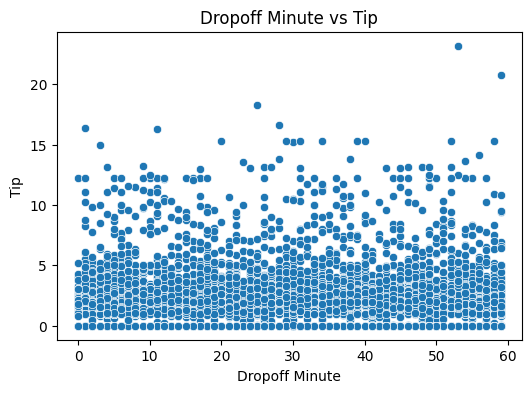

In [811]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_minute'], y=df['tip'])
plt.title("Dropoff Minute vs Tip")
plt.xlabel("Dropoff Minute")
plt.ylabel("Tip")
plt.show()


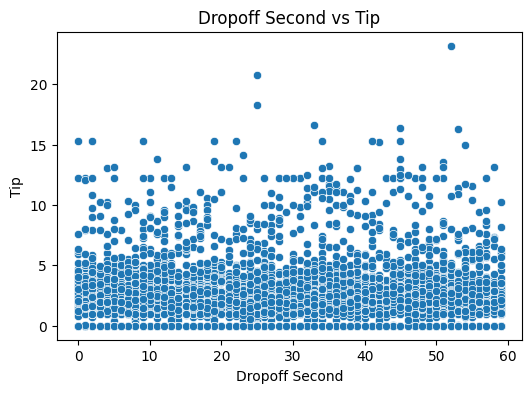

In [812]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_second'], y=df['tip'])
plt.title("Dropoff Second vs Tip")
plt.xlabel("Dropoff Second")
plt.ylabel("Tip")
plt.show()


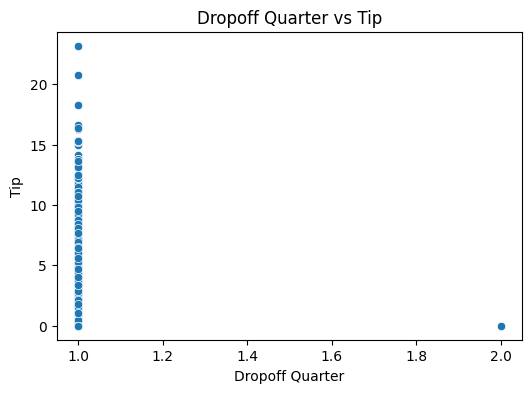

In [813]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['dropoff_quarter'], y=df['tip'])
plt.title("Dropoff Quarter vs Tip")
plt.xlabel("Dropoff Quarter")
plt.ylabel("Tip")
plt.show()


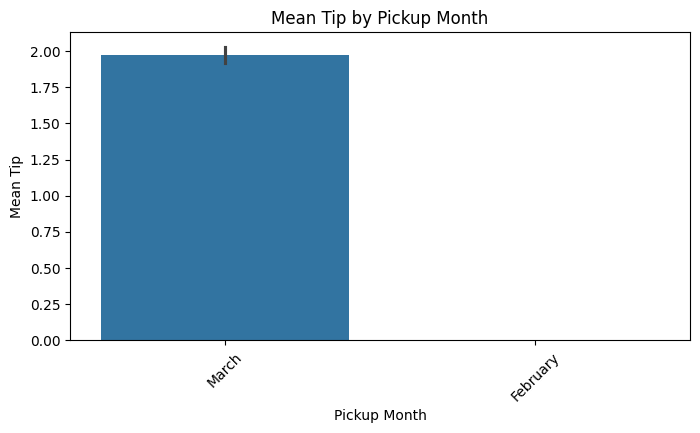

In [814]:
plt.figure(figsize=(8,4))
sns.barplot(x='pickup_month', y='tip', data=df, estimator='mean')
plt.title("Mean Tip by Pickup Month")
plt.xlabel("Pickup Month")
plt.ylabel("Mean Tip")
plt.xticks(rotation=45)
plt.show()


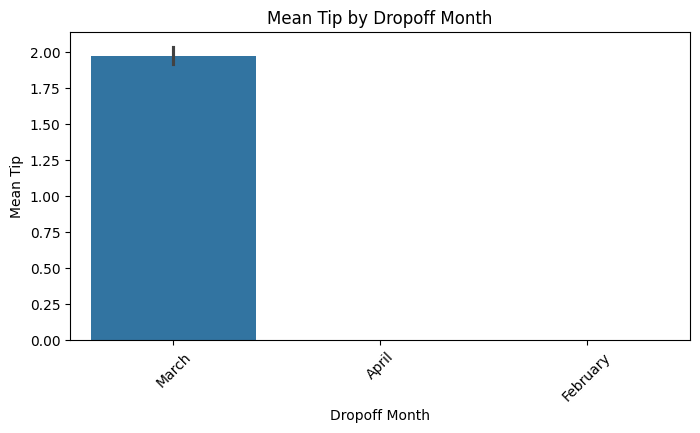

In [815]:
plt.figure(figsize=(8,4))
sns.barplot(x='dropoff_month', y='tip', data=df, estimator='mean')
plt.title("Mean Tip by Dropoff Month")
plt.xlabel("Dropoff Month")
plt.ylabel("Mean Tip")
plt.xticks(rotation=45)
plt.show()


In [816]:
drop_list = [
    'pickup_month',
    'pickup_day',
    'pickup_year',
    'dropoff_month',
    'dropoff_day',
    'dropoff_year',
    'dropoff_minute',
    'dropoff_second',
    'dropoff_quarter'
]

In [837]:
df=df.drop(columns=[
    'pickup_month',
    'pickup_day',
    'pickup_year',
    'dropoff_month',
    'dropoff_day',
    'dropoff_year',
    'dropoff_minute',
    'dropoff_second',
    'dropoff_quarter',
    'pickup',
    'dropoff'])

In [838]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [839]:
#fit-transform categories
cat=['color','payment','pickup_zone','dropoff_zone','pickup_borough','dropoff_borough','pickup_dayname','dropoff_dayname']
for i in cat:
  df[i]=lb.fit_transform(df[i])

In [840]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_dayname,pickup_hour,dropoff_dayname,dropoff_hour
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,2,1.008053,2,0.988807
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,1,0.347118,1,0.336019
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,6,0.512352,6,0.662413
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,3,-2.131387,3,-2.111935
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,2,-0.148583,2,-0.153571


In [841]:
cont=['fare','tolls','total','distance','pickup_hour','dropoff_hour'] # since passengers is discrete

In [842]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_dayname,pickup_hour,dropoff_dayname,dropoff_hour
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,2,1.008053,2,0.988807
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,1,0.347118,1,0.336019
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,6,0.512352,6,0.662413
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,3,-2.131387,3,-2.111935
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,2,-0.148583,2,-0.153571


In [843]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df[cont]=st.fit_transform(df[cont])

In [844]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_dayname,pickup_hour,dropoff_dayname,dropoff_hour
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,2,1.008053,2,0.988807
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,1,0.347118,1,0.336019
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,6,0.512352,6,0.662413
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,3,-2.131387,3,-2.111935
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,2,-0.148583,2,-0.153571


In [845]:
x=df.drop('tip',axis=1)
y=df.tip
print(x.shape)
print(y.shape)

(6341, 15)
(6341,)


In [846]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5072, 15)
X_test shape: (1269, 15)
y_train shape: (5072,)
y_test shape: (1269,)


In [848]:
num_cols = x_train.select_dtypes(include=['int64','int32','float64']).columns
print(num_cols)


Index(['passengers', 'distance', 'fare', 'tolls', 'total', 'color', 'payment',
       'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough',
       'pickup_dayname', 'pickup_hour', 'dropoff_dayname', 'dropoff_hour'],
      dtype='object')


In [849]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])


In [850]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_trained_scaled,y_train)
print("co-efficient or slope(m) : ",model.coef_[0])
print("intercept(c) : ",model.intercept_)


co-efficient or slope(m) :  -0.012104406728873128
intercept(c) :  1.9759187697160883


In [851]:

y_pred=model.predict(x_test_scaled)
print(y_pred)

[-1.27702852e-02  1.79637811e-01  3.96661671e+00 ...  1.88526061e+00
 -6.56648426e-01  1.48075173e+01]


In [852]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred) #R-Square test
print("R-Square score : ",r2)


R-Square score :  0.9250827837008955


In [853]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
print("Mean Squared Error : ",mse)

Root Mean Squared Error :  0.6285208338155867
Mean Squared Error :  0.39503843854024034


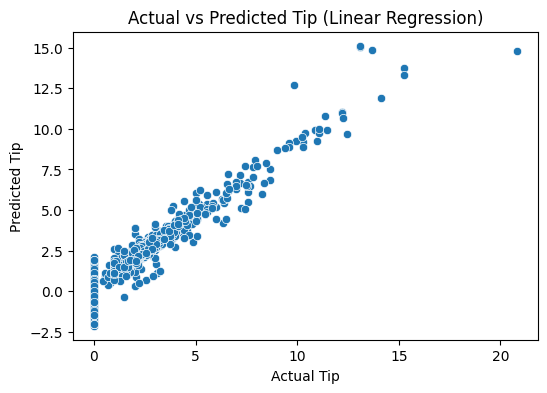

In [854]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs Predicted Tip (Linear Regression)")
plt.show()
